# Data Network Graph
Undirected Network Graph used to visually represent data transormation pipeline in databricks for agile sprint review.

Text(-0.75, -1, 'Blue nodes: row or intermediate data \nPink nodes: desired output data')

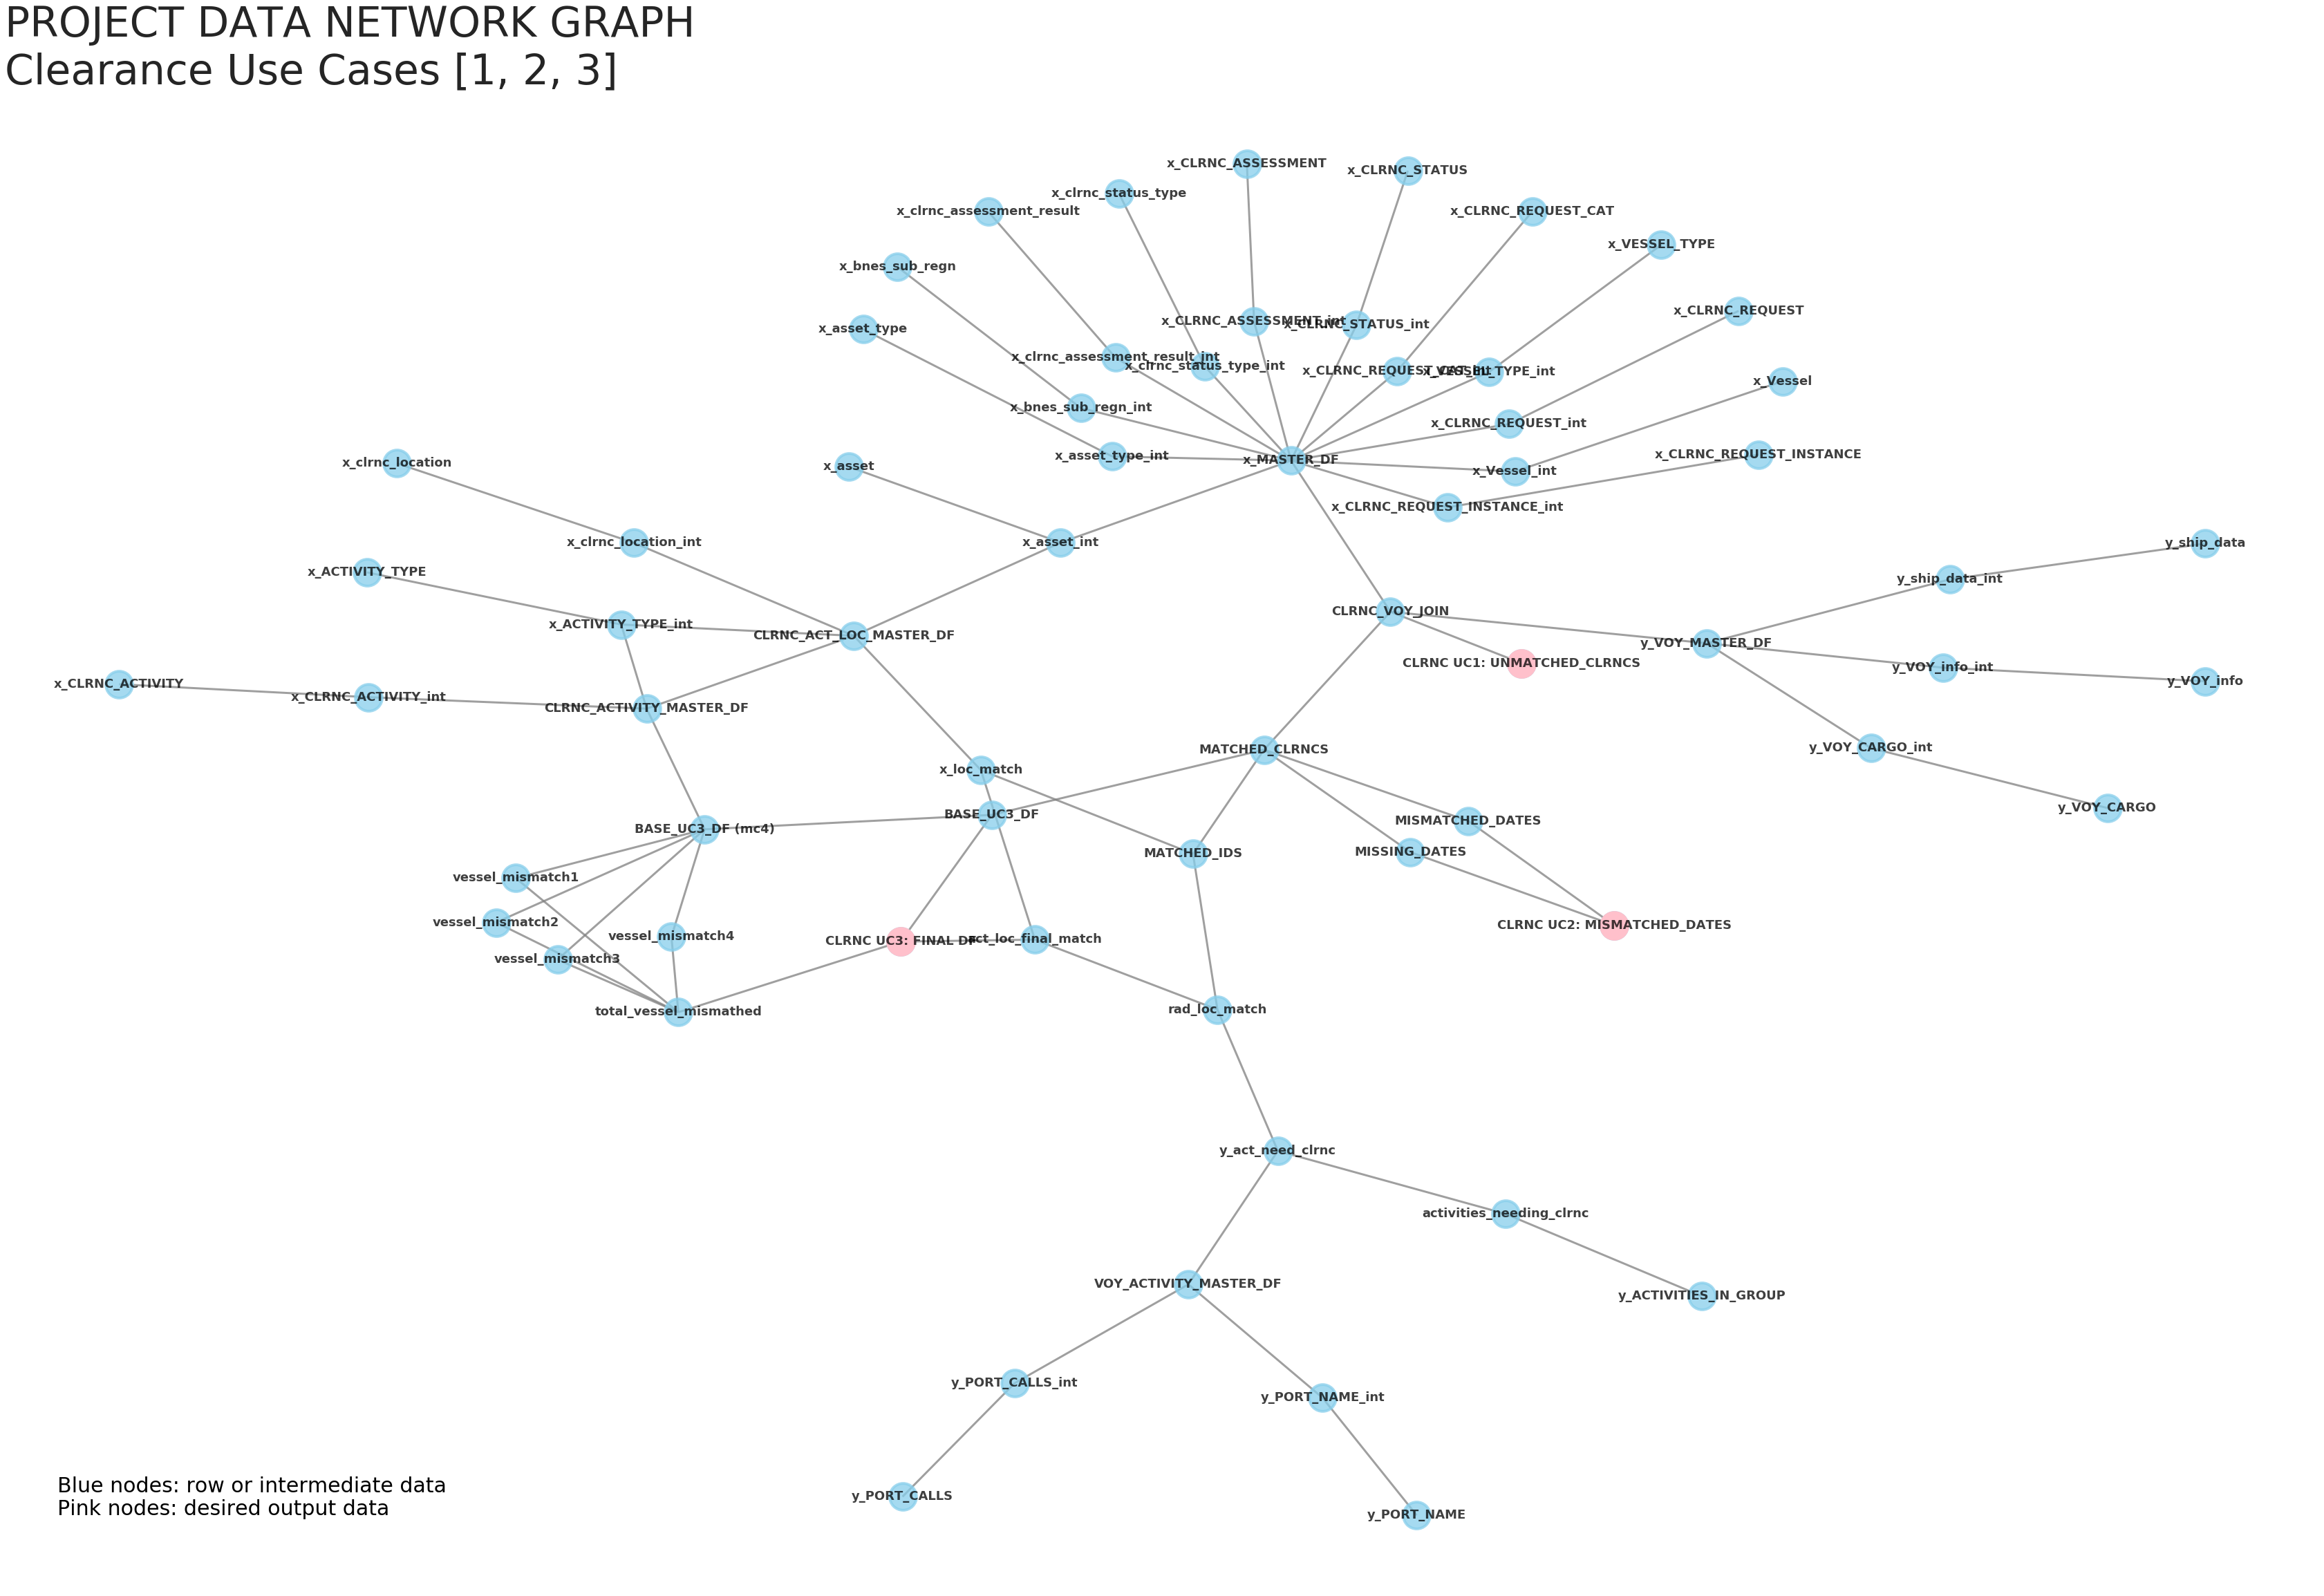

In [1]:
import networkx as nx 
import matplotlib.pyplot as plt



G = nx.Graph() 
G.add_edges_from([('y_VOY_CARGO', 'y_VOY_CARGO_int'), ('y_VOY_info', 'y_VOY_info_int'), ('y_ship_data', 'y_ship_data_int')
                  , ('x_CLRNC_REQUEST_INSTANCE', 'x_CLRNC_REQUEST_INSTANCE_int'), ('x_Vessel', 'x_Vessel_int'), ('x_CLRNC_REQUEST', 'x_CLRNC_REQUEST_int'), ('x_VESSEL_TYPE', 'x_VESSEL_TYPE_int'), ('x_CLRNC_REQUEST_CAT', 'x_CLRNC_REQUEST_CAT_int'), ('x_CLRNC_STATUS', 'x_CLRNC_STATUS_int'), ('x_CLRNC_ASSESSMENT', 'x_CLRNC_ASSESSMENT_int'), 
                    ('x_asset', 'x_asset_int'), ('x_ACTIVITY_TYPE', 'x_ACTIVITY_TYPE_int'), ('x_CLRNC_ACTIVITY', 'x_CLRNC_ACTIVITY_int'), ('y_PORT_CALLS', 'y_PORT_CALLS_int'), ('x_clrnc_status_type', 'x_clrnc_status_type_int')
                 ,('x_clrnc_assessment_result','x_clrnc_assessment_result_int'),('x_bnes_sub_regn','x_bnes_sub_regn_int'),('x_asset_type', 'x_asset_type_int')
                 ,('x_clrnc_location','x_clrnc_location_int')
                 # begin x merge
                 ,('x_CLRNC_REQUEST_INSTANCE_int','x_MASTER_DF')
                 ,                ('x_Vessel_int','x_MASTER_DF'), ('x_CLRNC_REQUEST_int','x_MASTER_DF'), ('x_VESSEL_TYPE_int','x_MASTER_DF'), ('x_CLRNC_REQUEST_CAT_int','x_MASTER_DF'), ('x_CLRNC_STATUS_int','x_MASTER_DF'), ('x_CLRNC_ASSESSMENT_int','x_MASTER_DF'), 
                    ('x_asset_int','x_MASTER_DF'), ( 'x_clrnc_status_type_int','x_MASTER_DF')
                 ,('x_clrnc_assessment_result_int','x_MASTER_DF'),('x_bnes_sub_regn_int','x_MASTER_DF'),( 'x_asset_type_int','x_MASTER_DF')
                 # begin x activity merge
                  ,('x_CLRNC_ACTIVITY_int','CLRNC_ACTIVITY_MASTER_DF'),('x_ACTIVITY_TYPE_int','CLRNC_ACTIVITY_MASTER_DF')
                  ,('x_clrnc_location_int','CLRNC_ACT_LOC_MASTER_DF'),('x_asset_int','CLRNC_ACT_LOC_MASTER_DF')
                  ,('x_ACTIVITY_TYPE_int','CLRNC_ACT_LOC_MASTER_DF'),('CLRNC_ACTIVITY_MASTER_DF','CLRNC_ACT_LOC_MASTER_DF')
                  # finish y intermediate tables
                  ,('y_PORT_NAME','y_PORT_NAME_int'),('y_ACTIVITIES_IN_GROUP','activities_needing_clrnc')
                  # y master table
                  ,('y_VOY_CARGO_int','y_VOY_MASTER_DF'),('y_VOY_info_int','y_VOY_MASTER_DF'),('y_ship_data_int','y_VOY_MASTER_DF')
                  # y activity master
                  ,('y_PORT_CALLS_int','VOY_ACTIVITY_MASTER_DF'),('y_PORT_NAME_int','VOY_ACTIVITY_MASTER_DF')                  
                  # filtered clrncs to x_y_merge
                  ,('x_MASTER_DF', 'CLRNC_VOY_JOIN'),('y_VOY_MASTER_DF','CLRNC_VOY_JOIN'),('CLRNC_VOY_JOIN','MATCHED_CLRNCS')
                  ,('CLRNC_VOY_JOIN','CLRNC UC1: UNMATCHED_CLRNCS')
                  # UC2
                  ,('MATCHED_CLRNCS','MISMATCHED_DATES'),('MATCHED_CLRNCS','MISSING_DATES'),('MISSING_DATES','CLRNC UC2: MISMATCHED_DATES'),('MISMATCHED_DATES','CLRNC UC2: MISMATCHED_DATES')
                 # UC 3 
                  ,('MATCHED_CLRNCS','BASE_UC3_DF'),('BASE_UC3_DF','BASE_UC3_DF (mc4)'), ('CLRNC_ACTIVITY_MASTER_DF','BASE_UC3_DF (mc4)')
                  ,('BASE_UC3_DF (mc4)','vessel_mismatch1'),('BASE_UC3_DF (mc4)','vessel_mismatch2'),('BASE_UC3_DF (mc4)','vessel_mismatch3'),('BASE_UC3_DF (mc4)','vessel_mismatch4')
                 ,('vessel_mismatch1','total_vessel_mismathed')
                  ,('vessel_mismatch2','total_vessel_mismathed')
                  ,('vessel_mismatch3','total_vessel_mismathed')
                  ,('vessel_mismatch4','total_vessel_mismathed')
                  # UC 3 -loc act
                  ,('MATCHED_CLRNCS','MATCHED_IDS'),('MATCHED_IDS','x_loc_match'),('CLRNC_ACT_LOC_MASTER_DF','x_loc_match')
                  ,('x_loc_match','act_loc_final_match')
                  
                  ,('activities_needing_clrnc','y_act_need_clrnc'),('VOY_ACTIVITY_MASTER_DF','y_act_need_clrnc')
                  ,('y_act_need_clrnc','rad_loc_match')
                  ,('MATCHED_IDS','rad_loc_match')
                  ,('rad_loc_match','act_loc_final_match')
                  
                  ,('act_loc_final_match','CLRNC UC3: FINAL DF')
                 ,('total_vessel_mismathed','CLRNC UC3: FINAL DF')
                  ,('BASE_UC3_DF','CLRNC UC3: FINAL DF')
            
                 ]) 



fig = plt.figure(figsize =(60,40)) 
pos = nx.kamada_kawai_layout(G)
plt.axis('off') 
nx.draw_networkx(G, pos, node_size=1500, node_color="skyblue", node_shape="o", alpha=0.75, linewidths=4, font_size=18, font_color="black", font_weight="bold", width=3, edge_color="grey")
#fig.set_facecolor("#00000F")

nx.draw_networkx(G.subgraph('CLRNC UC3: FINAL DF'), pos=pos, with_labels=False, node_color='pink', node_size=1500,linewidths=4)
nx.draw_networkx(G.subgraph('CLRNC UC1: UNMATCHED_CLRNCS'), pos=pos, with_labels=False, node_color='pink', node_size=1500,linewidths=4)
nx.draw_networkx(G.subgraph('CLRNC UC2: MISMATCHED_DATES'), pos=pos, with_labels=False, node_color='pink', node_size=1500,linewidths=4)
plt.title('PROJECT DATA NETWORK GRAPH \nClearance Use Cases [1, 2, 3]', fontdict = {'fontsize': 60,'alpha' :.85},loc = 'left')
plt.text(-0.75,-1,'Blue nodes: row or intermediate data \nPink nodes: desired output data',horizontalalignment='left', fontsize = 30)


In [2]:
plt.savefig('Ex_DATA_NETWORK_GRAPH')

<Figure size 432x288 with 0 Axes>